# Pandas Exercise
---
In this exercise, we will be using a dataset avaliable from [Kaggle](https://www.kaggle.com/leekahhow/singapore-psi-pm25-20162019). You can download this dataset (`psi_df_2016_2019.csv`) from Moodle. This dataset consists of the Pollutant Standards Index (PSI), specifically pm2.5 data. 

The dataset has these columns
* north
* south
* east
* west
* central
* national
* timestamp

We will be going through how to extract a subset of data from the main dataset and plot this subset.

## Importing the libraries
---
Complete the code cell to define which libraries are required for:
* pandas
* plotting

In [1]:
import datetime
import pandas as pd
import matplotlib.pyplot as plt

## Loading and viewing the data 

Load the data.

In [4]:
df = pd.read_csv('psi_df_2016_2019.csv')

Check if the data have been loaded properly

In [5]:
df.head(5)

,national,south,north,east,central,west,timestamp
0,47,44,37,47,47,34,2016-02-07T18:00:00+08:00
1,59,57,54,59,57,56,2016-02-08T23:00:00+08:00
2,59,57,55,59,57,56,2016-02-09T01:00:00+08:00
3,59,57,55,59,56,56,2016-02-09T02:00:00+08:00
4,59,58,55,59,56,56,2016-02-09T03:00:00+08:00


Take a look at what the first 5 records

In [6]:
df.head(5)

,national,south,north,east,central,west,timestamp
0,47,44,37,47,47,34,2016-02-07T18:00:00+08:00
1,59,57,54,59,57,56,2016-02-08T23:00:00+08:00
2,59,57,55,59,57,56,2016-02-09T01:00:00+08:00
3,59,57,55,59,56,56,2016-02-09T02:00:00+08:00
4,59,58,55,59,56,56,2016-02-09T03:00:00+08:00


Check the data for any null values

In [7]:
df.isnull()

,national,south,north,east,central,west,timestamp
0,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...
30017,False,False,False,False,False,False,False
30018,False,False,False,False,False,False,False
30019,False,False,False,False,False,False,False
30020,False,False,False,False,False,False,False


## Sorting the data

As the timestamps are in string format, we will be converting it into pandas datetime object.

In [9]:
# convert the time stamp to pandas datetime object
df['timestamp'] = pd.to_datetime(df['timestamp'])

df

,national,south,north,east,central,west,timestamp
0,47,44,37,47,47,34,2016-02-07 18:00:00+08:00
1,59,57,54,59,57,56,2016-02-08 23:00:00+08:00
2,59,57,55,59,57,56,2016-02-09 01:00:00+08:00
3,59,57,55,59,56,56,2016-02-09 02:00:00+08:00
4,59,58,55,59,56,56,2016-02-09 03:00:00+08:00
...,...,...,...,...,...,...,...
30017,76,78,72,74,78,71,2019-11-06 10:00:00+08:00
30018,75,77,71,73,77,71,2019-11-06 11:00:00+08:00
30019,74,77,71,73,77,71,2019-11-06 12:00:00+08:00
30020,74,78,72,73,78,71,2019-11-06 13:00:00+08:00


Since this data is has a span of 3 different years we would like to split it up into year and months
<br>
We added the year and month column to the dataframe

In [15]:
df['year'] = pd.DatetimeIndex(df['timestamp']).year
df['month'] = pd.DatetimeIndex(df['timestamp']).month
df

,national,south,north,east,central,west,timestamp,year,month
0,47,44,37,47,47,34,2016-02-07 18:00:00+08:00,2016,2
1,59,57,54,59,57,56,2016-02-08 23:00:00+08:00,2016,2
2,59,57,55,59,57,56,2016-02-09 01:00:00+08:00,2016,2
3,59,57,55,59,56,56,2016-02-09 02:00:00+08:00,2016,2
4,59,58,55,59,56,56,2016-02-09 03:00:00+08:00,2016,2
...,...,...,...,...,...,...,...,...,...
30017,76,78,72,74,78,71,2019-11-06 10:00:00+08:00,2019,11
30018,75,77,71,73,77,71,2019-11-06 11:00:00+08:00,2019,11
30019,74,77,71,73,77,71,2019-11-06 12:00:00+08:00,2019,11
30020,74,78,72,73,78,71,2019-11-06 13:00:00+08:00,2019,11


We now need to extract the data for the year 2016. To work with a clean dataset, we would like to remove the columns `timestamp` and `year`.

**Hint:** Find out how a copy of a object is done

In [24]:
# performs a deep copy of the dataframe 
df_2016 = df[df['year']==2016]
df_2016 = df_2016.set_index(df_2016['year']).drop(['timestamp'], axis=1)

df_2016

,national,south,north,east,central,west,year,month
year,,,,,,,,
2016,47,44,37,47,47,34,2016,2
2016,59,57,54,59,57,56,2016,2
2016,59,57,55,59,57,56,2016,2
2016,59,57,55,59,56,56,2016,2
2016,59,58,55,59,56,56,2016,2
...,...,...,...,...,...,...,...,...
2016,33,28,30,33,23,25,2016,12
2016,33,28,31,33,24,25,2016,12
2016,35,29,32,35,25,25,2016,12


Saving the dataframe into a CSV file for future use (not required but you may want to know how it can be done)

In [25]:
df_2016.to_csv('psi_df_2016.csv', index=False)

## Normalizing the data for plotting

Calculate the mean of PSI by month for the year of 2016

In [35]:
df_mean_by_month_2016 = df_2016.groupby(df_2016['month']).mean()
df_mean_by_month_2016 = df_mean_by_month_2016.reset_index()
df_mean_by_month_2016 = df_mean_by_month_2016.set_index(df_mean_by_month_2016['year'])

plotdf = df_mean_by_month_2016

Plot the Mean PSI values for the year 2016. The x-axis is the months and the y-axis is the column data.

**Hint:** If you have already used the `groupby` function in the previous code cell, check that your dataframe has the right columns and whether or not the dataframe's index can be used.

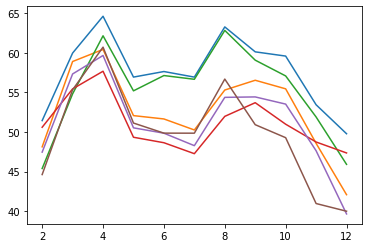

In [36]:
plt.plot(plotdf['month'],plotdf['national south north east central west'.split()])
plt.x_label()